# Tolerancing - Sensitivity Study

In [1]:
from optiland.samples.objectives import CookeTriplet
from optiland.tolerancing import RangeSampler, SensitivityAnalysis, Tolerancing

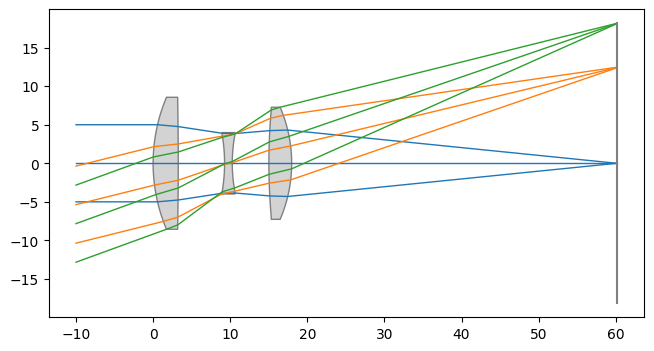

In [2]:
optic = CookeTriplet()
optic.draw()

In [3]:
tolerancing = Tolerancing(optic)

In [4]:
# radius scan
sampler = RangeSampler(start=15, end=30, steps=128)
tolerancing.add_perturbation("radius", sampler, surface_number=1)

# tilt scan
sampler = RangeSampler(start=-0.05, end=0.05, steps=128)  # radians
tolerancing.add_perturbation("tilt", sampler, surface_number=1, axis="x")

# thickness scan
sampler = RangeSampler(start=2, end=5, steps=128)
tolerancing.add_perturbation("thickness", sampler, surface_number=1)

Define operands:

In [ ]:
input_data = {"optic": optic}
tolerancing.add_operand("f2", input_data)

# surface_number=-1 means the last surface
input_data = {
    "optic": optic,
    "surface_number": -1,
    "Hx": 0,
    "Hy": 0.0,
    "wavelength": 0.55,
    "num_rays": 5,
}
tolerancing.add_operand("rms_spot_size", input_data, target=0)

input_data = {"optic": optic, "Hx": 0, "Hy": 1, "wavelength": 0.55, "num_rays": 5}
tolerancing.add_operand("OPD_difference", input_data)

In [6]:
sensitivity_analysis = SensitivityAnalysis(tolerancing)

In [7]:
sensitivity_analysis.run()

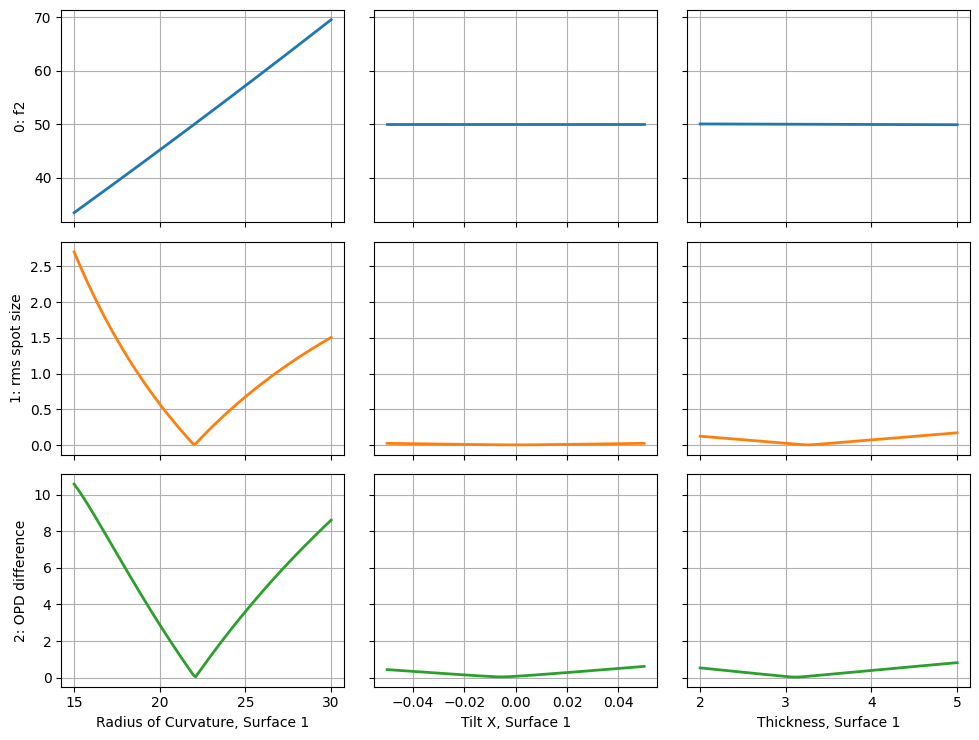

In [8]:
sensitivity_analysis.view()

Get pandas dataframe:

In [9]:
df = sensitivity_analysis.get_results()

In [10]:
df.head()

,perturbation_type,perturbation_value,0: f2,1: rms spot size,2: OPD difference
0,"Radius of Curvature, Surface 1",15.000000,33.469945,2.701670,10.590084
1,"Radius of Curvature, Surface 1",15.118110,33.743491,2.634001,10.438667
2,"Radius of Curvature, Surface 1",15.236220,34.017200,2.567470,10.281144
3,"Radius of Curvature, Surface 1",15.354331,34.291071,2.502048,10.118328
4,"Radius of Curvature, Surface 1",15.472441,34.565104,2.437704,9.950932
